# Histogram Equalization

# Image Hiding

In [1]:
import cv2 
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
cover=cv2.imread("elaine.tiff",0)

In [3]:
secret=cv2.imread("fishingboat.tiff",0)

In [4]:
secret=cv2.resize(secret,(64,64))
r = c = 64

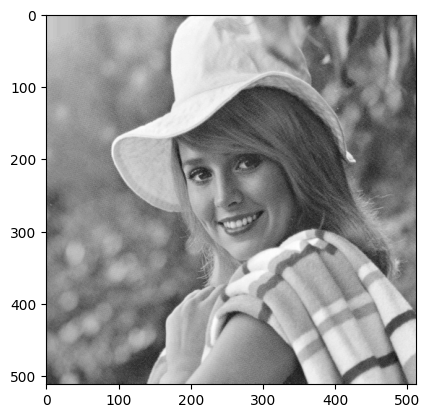

In [5]:
plt.imshow(cover,cmap='gray')
plt.show()

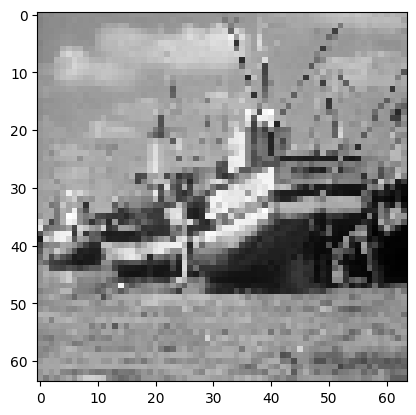

In [6]:
plt.imshow(secret,cmap='gray')
plt.show()

In [7]:
def int_to_bin(decimal):
    return ('{0:08b}'.format(decimal))

In [8]:
int_to_bin(r)

'01000000'

In [9]:
def bin_to_int(binary):
    return (int(binary, 2))

In [10]:
def image_to_bits(image):
    flat_data=image.flatten()
    msg=''
    for x in flat_data:
        msg=msg+int_to_bin(x)
    return msg

def bits_to_image(msg,r,c):
    l=len(msg)
    msg_im=[]
    pos=0
    while pos<l:
        msg_im.append(bin_to_int(msg[pos:pos+8]))
        pos=pos+8
    msg_im=np.reshape(msg_im,(r,c))
    return msg_im

In [11]:
def row_col(stego):
    flat_data=stego.flatten()
    msg=''
    for x in flat_data:
        msg=msg+int_to_bin(x)
    r = bin_to_int(msg[0:8])
    c = bin_to_int(msg[8:16])
    return r,c
    

In [12]:
def Embedding2lsb(cover,secret):
    r=cover.shape[0]
    c=cover.shape[1]
    stego=cover.flatten()
    smsg=image_to_bits(secret)
    pos=0
    l=len(smsg)
    i=0
    while(pos < 16):
        m=list(int_to_bin(r))
        m.append(int_to_bin(c))
        y=smsg[pos:pos+2]
        m[6:]=y
        n="".join(m)
        stego[i]=bin_to_int(n)
        i=i+1
        pos=pos+2
    m = []
    pos = 16
    while pos<l:
        pix=stego[i]
        bpix=int_to_bin(pix)
        m=list(bpix)
        y=smsg[pos:pos+2]
        m[6:]=y
        n="".join(m)
        stego[i]=bin_to_int(n)
        i=i+1
        pos=pos+2
    stego=np.reshape(stego,(r,c))
    return stego   
      

In [13]:
def Extraction2lsb(stego,r,c):
    stego=stego.flatten()
    nop=r*c*4
    msg=''
    i=0
    while i<nop:
        pix=stego[i]
        bpix=int_to_bin(pix)
        bits=bpix[6:]
        msg=msg+bits
        i=i+1
    rimg=bits_to_image(msg,r,c)
    return rimg  
    
    
    

In [14]:
def mse_psnr(a,b):    
    a=a.astype('float64')
    b=b.astype('float64')
    rows,cols=a.shape
    a=a.ravel()
    b=b.ravel()
    mse=0.0
    for i in range(rows*cols):
        mse=mse+math.pow(a[i]-b[i],2)
    mse=mse/(rows*cols)   
    try:
        psnr=20 * math.log10(255.0/ math.sqrt(mse))
        return mse,psnr
    except:
        return mse,-999

In [15]:
stego=Embedding2lsb(cover,secret)

In [16]:
r,c = row_col(stego)
c

131

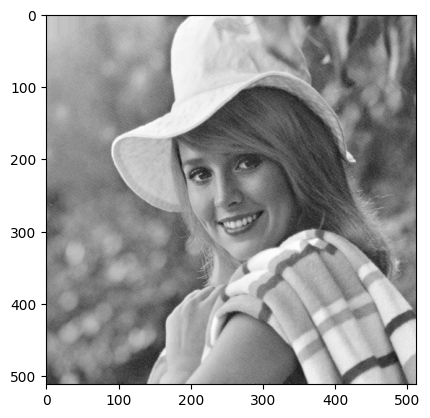

In [17]:
plt.imshow(stego,cmap='gray')
plt.show()

In [18]:
rsecret=Extraction2lsb(stego,64,64)

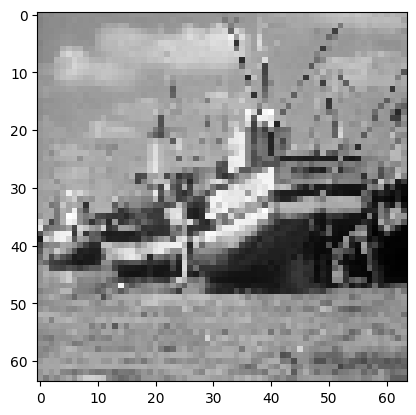

In [19]:
plt.imshow(rsecret,cmap='gray')
plt.show()

In [20]:
mse,psnr=mse_psnr(cover,stego)

In [21]:
print(mse,psnr)

0.2584342956542969 54.007302144508806


In [22]:
mse,psnr=mse_psnr(secret,rsecret)
print(mse,psnr)

0.0 -999


In [23]:
import os

# 1 bit LSB

In [24]:
def Embedding1lsb(cover,secret):
    r=cover.shape[0]
    c=cover.shape[1]
    stego=cover.flatten()
    smsg=image_to_bits(secret)
    pos=0
    l=len(smsg)
    i=0
    while(pos < 8):
        m=list(int_to_bin(r))
        m.append(int_to_bin(c))
        y=smsg[pos:pos+1]
        m[7:]=y
        n="".join(m)
        stego[i]=bin_to_int(n)
        i=i+1
        pos=pos+1
    m = []
    pos = 8
    while pos<l:
        pix=stego[i]
        bpix=int_to_bin(pix)
        m=list(bpix)
        y=smsg[pos:pos+1]
        m[7:]=y
        n="".join(m)
        stego[i]=bin_to_int(n)
        i=i+1
        pos=pos+1
    stego=np.reshape(stego,(r,c))
    return stego   
      

In [25]:
def Extraction1lsb(stego,r,c):
    stego=stego.flatten()
    nop=r*c*8
    msg=''
    i=0
    while i<nop:
        pix=stego[i]
        bpix=int_to_bin(pix)
        bits=bpix[7:]
        msg=msg+bits
        i=i+1
    rimg=bits_to_image(msg,r,c)
    return rimg  
    
    
    

In [26]:
cover=cv2.imread("elaine.tiff",0)

In [27]:
secret=cv2.imread("fishingboat.tiff",0)

In [28]:
secret=cv2.resize(secret,(64,64))
r = c = 64

In [29]:
stego=Embedding1lsb(cover,secret)

In [30]:
r,c = row_col(stego)
c

129

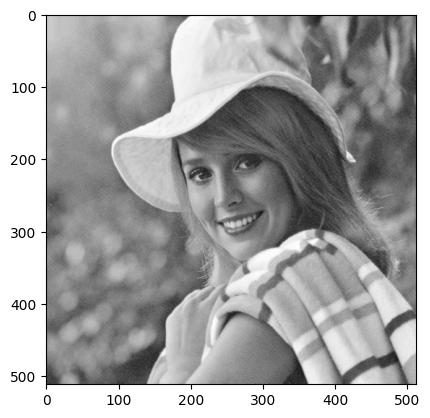

In [31]:
plt.imshow(stego,cmap='gray')
plt.show()

In [32]:
rsecret=Extraction1lsb(stego,64,64)

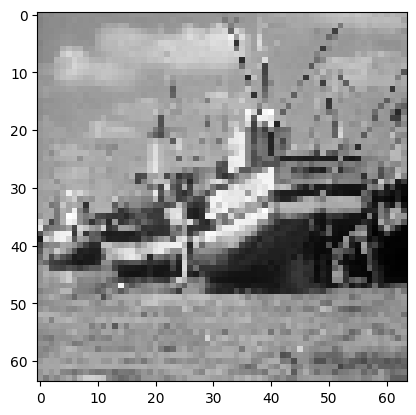

In [33]:
plt.imshow(rsecret,cmap='gray')
plt.show()

In [34]:
mse,psnr=mse_psnr(cover,stego)

In [35]:
print(mse,psnr)

0.18003082275390625 55.57733494620362


In [36]:
mse,psnr=mse_psnr(secret,rsecret)
print(mse,psnr)

0.0 -999


# Arnold Catmap or Transformation F : T^2 --->> T^2

# Apply Catmap 

In [37]:
def arnold_cat_map(image, iterations):
    h, w  = image.shape
    size = h
    mapped_image = np.zeros_like(image)

    for _ in range(iterations):
        for y in range(size):
            for x in range(size):
                new_x = (x + y) % size
                new_y = (2*y - x) % size
                mapped_image[new_y, new_x] = image[y, x]

    return mapped_image

def inverse_arnold_cat_map(image, iterations):
    h, w  = image.shape
    size = h
    inv_mapped_image = np.zeros_like(image)

    for _ in range(iterations):
        for y in range(size):
            for x in range(size):
                new_x = (y - x) % size
                new_y = (-x + 2*y) % size
                inv_mapped_image[new_y, new_x] = image[y, x]

    return inv_mapped_image


In [38]:
cover_image = cv2.imread('fishingboat.tiff',0)
secret_image = cv2.imread('elaine.tiff',0)

secret_image = cv2.resize(secret_image,(64,64))
r = c = 64

num_iterations = 30
scrambled_secret_image = arnold_cat_map(secret_image, num_iterations)



In [39]:
scrambled_secret_image.shape

(64, 64)

In [40]:
cover_image.shape

(512, 512)

In [41]:
stego_image = Embedding1lsb(cover_image, scrambled_secret_image)
r,c = row_col(stego_image)
c
extracted_secret_image = Extraction1lsb(stego_image, 64, 64)

In [42]:
extracted_secret_image.shape

(64, 64)

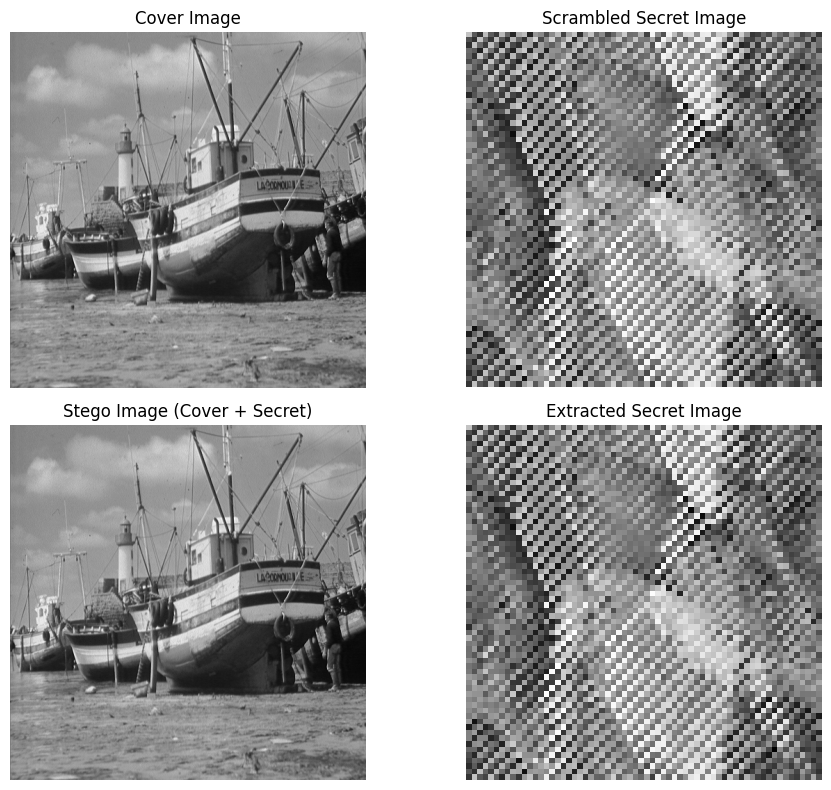

In [43]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Cover Image')
plt.imshow(cover_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Scrambled Secret Image')
plt.imshow(scrambled_secret_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Stego Image (Cover + Secret)')
plt.imshow(stego_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Extracted Secret Image')
plt.imshow(extracted_secret_image,cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

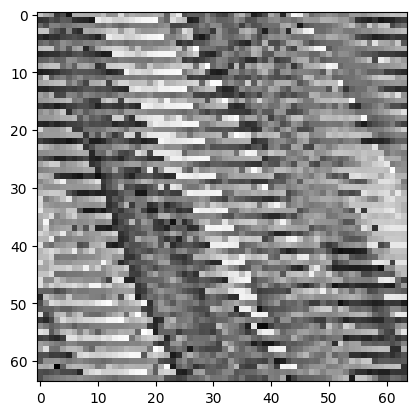

In [44]:
re = inverse_arnold_cat_map(extracted_secret_image, num_iterations)
plt.imshow(re, cmap='gray')
plt.show()

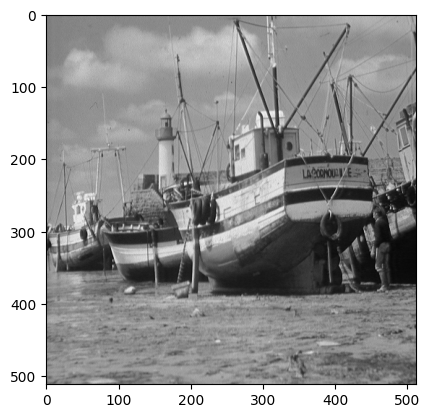

In [45]:
import cv2
import numpy as np

def arnold_cat_map(image, iterations):
    h, w  = image.shape
    size = h
    mapped_image = np.zeros_like(image)

    for _ in range(iterations):
        for y in range(size):
            for x in range(size):
                new_x = (x + y) % size
                new_y = (2*y - x) % size
                mapped_image[new_y, new_x] = image[y, x]
    return mapped_image

def inverse_arnold_cat_map(image, iterations):
    h, w = image.shape
    size = h
    inv_mapped_image = np.zeros_like(image)

    for _ in range(iterations):
        for y in range(size):
            for x in range(size):
                new_x = (y - x) % size
                new_y = (-x + 2*y) % size
                inv_mapped_image[new_y, new_x] = image[y, x]

    return inv_mapped_image


encrypted_image = cv2.imread('fishingboat.tiff',0)
plt.imshow(encrypted_image, cmap='gray')
plt.show()


In [46]:
iterations = 10
decrypted_image = arnold_cat_map(encrypted_image, iterations)

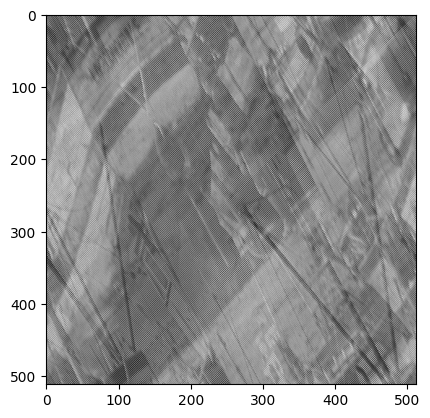

In [47]:
plt.imshow(decrypted_image, cmap='gray')

plt.show()

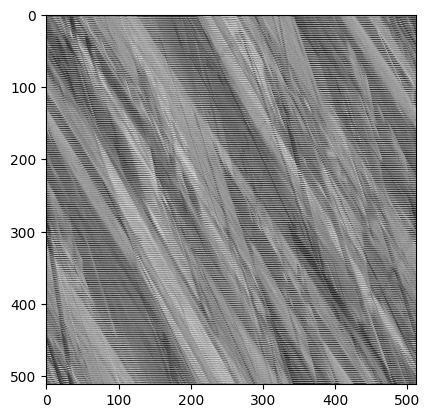

In [48]:
recoverd = inverse_arnold_cat_map(decrypted_image, iterations)
plt.imshow(recoverd, cmap='gray')
plt.show()
